In [59]:
def problem1(filename):
    import pandas as pd
    import numpy as np
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import Ridge
    from sklearn.preprocessing import StandardScaler
    from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest
    
    data=pd.read_csv(filename,sep=',') #reading the data
    data.drop('Date',axis=1,inplace=True)  #cleaning the redundant column
    features=data.iloc[:,1:] #features
    targets=data.iloc[:,0] #targets
    features=features.replace('(?<=\d),','',regex=True) #replacing "," to "''" in numbers 
    targets=targets.replace('(?<=\d),','',regex=True)  
    features = features.astype(float) #converting string type into float 
    targets=targets.astype(float)
    
    #1-a mutual info
    model_mi=SelectKBest(score_func=mutual_info_regression,k=4) #using selectkbest , i constructed  mutual info mechanisim for top 4 features with best scores
    select_mi=model_mi.fit(features,targets) #fitting mutual info technique in our data
    indices_mi=np.argsort(select_mi.scores_)[::-1] #keeping indice info sorting the mutual information scores 
    print('Selected features having top mutual information scores')
    
    mi_top4=[] 
    for i in range(4):
        mi_top4.append(features.columns[indices_mi][i]) #keeping top 4 features in a list
    print(mi_top4) #displaying top 4 features
        
    
    
    #1-b
    model_ridge=Ridge() #creating ridge model
    rfe=RFE(model_ridge,n_features_to_select=4) #feature selection model with recursive feature elimination method
    select_rfe=rfe.fit(features,targets) #fitting feature selection model into  data
    
    
    rfe_top4=[]
    for i in range(8):
        if select_rfe.ranking_[i]==1: #1 means that feature is selected
            rfe_top4.append(features.columns[i]) #getting top 4 features in a list
    print('Selected features by Recursive Feature Elimination')
    print(rfe_top4) #displaying top 4 features

    
    
    

In [60]:
problem1('homewor2-data/fitbit.csv')

Selected features having top mutual information scores
['Activity Calories', 'Minutes Fairly Active', 'Steps', 'Distance']
Selected features by Recursive Feature Elimination
['Distance', 'Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active']


In [61]:
def problem2(filename):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from sklearn.metrics import silhouette_score
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import StandardScaler
    data=pd.read_csv(filename,sep=',') #reading data
    data.drop('ID',axis=1,inplace=True) #cleaning data
    sc=StandardScaler() 
    scaled_features=sc.fit_transform(data) #scaling data using standard scaler method
    
    inertia_data=[] #list for elbow method
    silhouette_data=[] #list for silhouette method
    for i in range(2,10): 
        #creating k-means algorithm model for cluster numbers from 2 to 9
        k_means=KMeans(n_clusters=i,n_init=5) #n_init=5 means for each cluster number do this opertion 5 TİME
        k_means.fit(scaled_features) #fitting k-means model onto our feature data
        inertia_data.append(k_means.inertia_) #getting elbow distortion data
        silhouette_data.append(silhouette_score(scaled_features,k_means.labels_))
    
    #plotting data of tested k numbers, from 2 to 9 for elbow method
    cluster_numbers=np.arange(2,10) 
    plt.plot(cluster_numbers,inertia_data,"mo-")
    plt.xlabel("Cluster number")
    plt.ylabel("Inertia or Distortion")
    plt.title("Elbow method")
    plt.grid()
    plt.show()
    
    plt.plot(cluster_numbers,silhouette_data,"mo-") #plotting data of tested k numbers, from 2 to 9 for silhouette method
    plt.xlabel("Cluster number")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette method")
    plt.grid()
    plt.show()

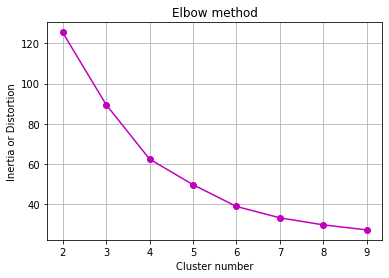

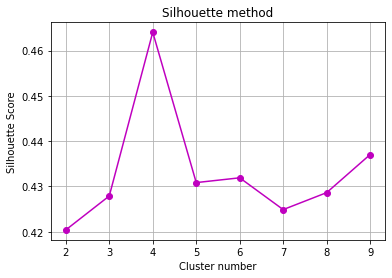

In [80]:
problem2('homewor2-data/customer.csv')

In [14]:
def problem3(filename):
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import LinearSVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.neural_network import MLPClassifier
    
    data=pd.read_csv(filename,sep=',') #reading data
    data.drop('customerID',axis=1,inplace=True) #cleaning data
    data['TotalCharges'].replace(' ', np.nan, inplace=True) #replacing empty data with nan value
    data=data.dropna(subset=['TotalCharges']) #droping nan values
    #organising non-numeric columns using get_dummies function
    data_update=pd.get_dummies(data,columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'],drop_first=True)
    X,y= data_update.iloc[:, :-1], data_update['Churn_Yes'] #indicating X and y matrices
    sc=StandardScaler() #standard scaler model
    scaled_X=sc.fit_transform(X) #fitting scaler onto feature set
    y=np.array(y) #converting output column to 1d array
    rkf=KFold(n_splits=5,shuffle=True,random_state=True) #k-fold model with 5 splits
    print('{:<29} {:<27} {:<23} '.format('MODEL', 'Train','Test'))
    dict_all={}

    logreg=LogisticRegression() #logistic regression model
    logreg_trains=[]
    logreg_tests=[]
    for train_index, test_index in rkf.split(scaled_X):
        X_train,X_test=scaled_X[train_index],scaled_X[test_index]
        y_train,y_test=y[train_index],y[test_index]
        #logreg
        model_logreg=logreg.fit(X_train,y_train) #training splitted data on training data 
        score_train_log=cross_val_score(model_logreg, X_train, y_train).mean() #validation score of our trained model
        score_test_log=model_logreg.score(X_test,y_test) #accuracy score of our model on the test data
        logreg_trains.append(score_train_log) #collecting data for each fold in a list
        logreg_tests.append(score_test_log) 
 
    #decisiontree
    dtc=DecisionTreeClassifier() #decision tree model
    dtc_trains=[]
    dtc_tests=[]
    for train_index, test_index in rkf.split(scaled_X):
        X_train,X_test=scaled_X[train_index],scaled_X[test_index]
        y_train,y_test=y[train_index],y[test_index]
        model_dtree=dtc.fit(X_train,y_train) #training splitted data on training data
        score_train_dtree=cross_val_score(model_dtree, X_train, y_train).mean() #validation score of our trained model
        score_test_dtree=model_dtree.score(X_test,y_test) #accuracy score of our model on our test data
        dtc_trains.append(score_train_dtree) #collecting data for each fold in a list
        dtc_tests.append(score_test_dtree)
    
    #linearSVC
    lsvc = LinearSVC(max_iter=2000) #linear svc model
    lsvc_trains=[]
    lsvc_tests=[]
    for train_index, test_index in rkf.split(scaled_X):
        X_train,X_test=scaled_X[train_index],scaled_X[test_index]
        y_train,y_test=y[train_index],y[test_index]
        model_lsvc=lsvc.fit(X_train,y_train)
        score_train_lsvc=cross_val_score(model_lsvc,X_train,y_train).mean()
        score_test_lsvc=model_lsvc.score(X_test,y_test)
        lsvc_trains.append(score_train_lsvc)
        lsvc_tests.append(score_test_lsvc)
        
        
    
    #knn
    knn=KNeighborsClassifier() #KNN model
    knn_trains=[]
    knn_tests=[]    
    for train_index, test_index in rkf.split(scaled_X):
        X_train,X_test=scaled_X[train_index],scaled_X[test_index]
        y_train,y_test=y[train_index],y[test_index]
        model_knn=knn.fit(X_train,y_train)
        score_train_knn=cross_val_score(model_knn,X_train,y_train).mean()
        score_test_knn=model_knn.score(X_test,y_test)
        knn_trains.append(score_train_knn)
        knn_tests.append(score_test_knn)
    
    #mlpclassifier
    mlp=MLPClassifier(max_iter=1000) #mlp classifier model
    mlp_trains=[]
    mlp_tests=[]
    for train_index, test_index in rkf.split(scaled_X):
        X_train,X_test=scaled_X[train_index],scaled_X[test_index]
        y_train,y_test=y[train_index],y[test_index]
        model_mlp=mlp.fit(X_train,y_train)
        score_train_mlp=cross_val_score(model_mlp,X_train,y_train).mean()
        score_test_mlp=model_mlp.score(X_test,y_test)    
        mlp_trains.append(score_train_mlp)
        mlp_tests.append(score_test_mlp)
        
    dict_all['LogisticRegression']=['LogisticRegression',np.mean(logreg_trains),np.mean(logreg_tests)]
    dict_all['DecisionTree']=['DecisionTree',np.mean(dtc_trains),np.mean(dtc_tests)]
    dict_all['LinearSVC']=['LinearSVC',np.mean(lsvc_trains),np.mean(lsvc_tests)]
    dict_all['KNN']=['KNN',np.mean(knn_trains),np.mean(knn_tests)]
    dict_all['MLPClassifier']=['MLPClassifier',np.mean(mlp_trains),np.mean(mlp_tests)]
    for key, value in dict_all.items():
        model,train,test=value
        print('{:<29} {:<27} {:<30} '.format(model,train,test))
        

In [15]:
problem3('homewor2-data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

MODEL                         Train                       Test                    
LogisticRegression            0.8032206828498125          0.8024763401039914             
DecisionTree                  0.7269259443457667          0.7276745716651452             
LinearSVC                     0.8026159542135385          0.8014809108289077             
KNN                           0.7600607223208999          0.7566864923502787             
MLPClassifier                 0.7626560884152359          0.7643652293298797             
